In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression,  LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from cv2 import resize
from scipy.linalg import eigh # eigen value and eigen vector for dimentally reduction 
import seaborn as sns

In [2]:
def predict_majority(input_):
    c = Counter(list(input_))
    c.most_common(1)
    return(c.most_common(1))
    
def plot_num(digits_,numbers, img_size):
    if type(numbers) ==int:
        plt.imshow(digits_[numbers].reshape(img_size, img_size))
        plt.show()
    else:
        for num in numbers:
            plt.imshow(digits_[num].reshape(img_size, img_size))
            plt.show()

def masked_non_zeros(data):
    masked =np.all(data ==0, axis= 0 )
    masked = np.where(masked==True,False, True)
    masked_digit = data[:, masked]

    return masked_digit

def normlized_data(masked_digit):
    """
    (x_i - mean) / std
    remove mean to the origin
    std = 1 for any feature
    """
    row,col = masked_digit.shape
    for co in range(col):
        mean  = masked_digit[:,co].mean()
        std = masked_digit[:,co].std()
        masked_digit[:,co] = (masked_digit[:,co] - mean)/std
    return masked_digit # return normllized 


mnist_data = pd.read_csv('mnist.csv').values

labels = mnist_data[:, 0] # ==> <class 'numpy.ndarray'> original R 1x784
digits = mnist_data[:, 1:] # ==> <class 'numpy.ndarray'>
img_size = 28

In [3]:
# if we were predicting the majority of the class: 
[(num, times)]=(predict_majority(labels))

D:\Anaconda_2\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

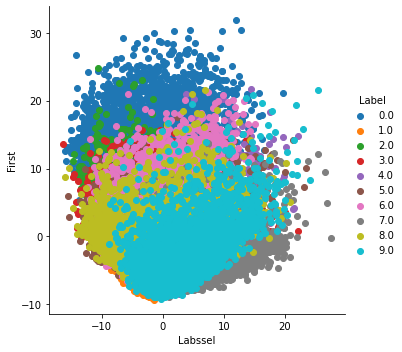

In [40]:
# Remove Features with only 0 values ==> Not a must since it will be taken care at a later stage as well
non_zero_df = masked_non_zeros(digits)

#Standardize The data
standardized_data= StandardScaler().fit_transform(non_zero_df)
coverience_mat = np.dot(standardized_data.T,standardized_data)
values_all, vectors_all = eigh(coverience_mat, eigvals=[706,707]) # ,eigvals=[700,707]

# Transform The Data Manually
transformsed_data = np.dot(vectors_all.T, standardized_data.T)
stacked_standarzided = np.vstack((labels, transformsed_data)).T

#PCA
pca = decomposition.PCA()
pca.n_components = 2
data_pca = pca.fit_transform(standardized_data)
stacked = np.vstack((data_pca.T, labels)).T
df_2 = pd.DataFrame(stacked, columns = { "Labssel", "Label","First"})
sns.FacetGrid(df_2, hue ="Label", size = 5).map(plt.scatter, "Labssel","First").add_legend()

plt.show

## Check The amount of PCA Needed

<function matplotlib.pyplot.show(close=None, block=None)>

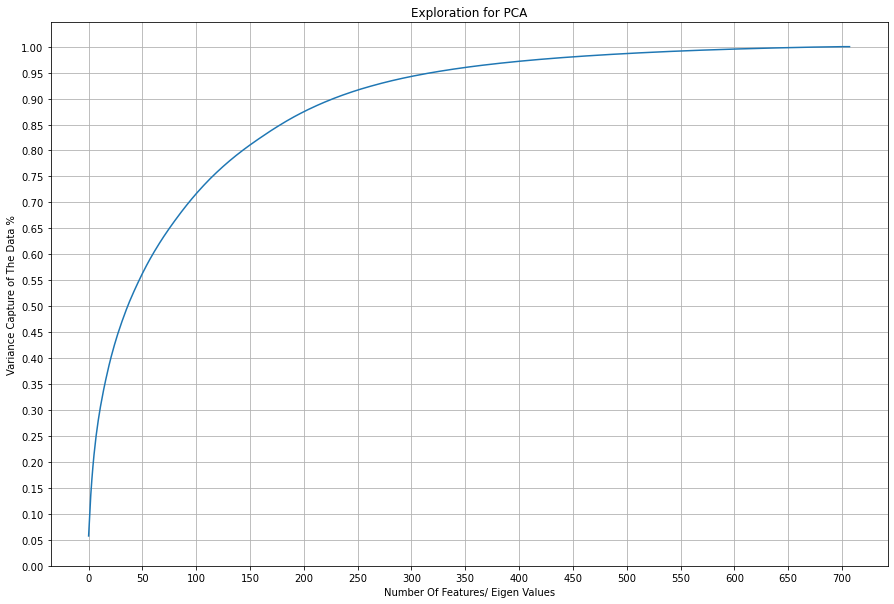

In [33]:
pca_2 = decomposition.PCA()
pca_2.n_components = 708
pca_data = pca_2.fit_transform(standardized_data)

Percentage_var = pca_2.explained_variance_/ np.sum(pca_2.explained_variance_)
cum_percentage_var = np.cumsum(Percentage_var)

cum_percentage_var_list  = list(cum_percentage_var)
fig = plt.figure(figsize=(15,10))

plt.title("Exploration for PCA")
plt.plot(cum_percentage_var_list)
plt.grid()
plt.xticks(np.arange(0, 750,50))
plt.yticks(np.arange(0, 1.05,0.05))
plt.ylabel("Variance Capture of The Data %")
plt.xlabel("Number Of Features/ Eigen Values")

plt.show

In [39]:
def model_get_best_grid_params(model):
    name_model =str(model)[:-2]
    if name_model =="MLPClassifier":
        return (name_model, {'alpha': [0.01, 0.1, 0.25, 0.5, 1, 2.5, 10]})
    elif name_model =="LogisticRegressionCV":
        return (name_model, {"l1_ratios":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]})
    elif name_model =="LogisticRegression":
        return( name_model, {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 0.25, 0.5, 1, 2.5, 10]})
    elif name_model == "SVC":
        return (name_model, {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']})


In [160]:
sum_intensity = np.sum(digits,axis= 0)
most_frequqnt_pixel = np.argmax(sum_intensity)

array_pixel_by_digit = [[0] for i in range(10)]
num_occur = [[0] for i in range(10)]

validate = [[0] for i in range(10)]
for idx, num in enumerate(labels):
    curr_pixel_row = np.expand_dims(standardized_data[idx,:],axis=0) 
    num_array_array = array_pixel_by_digit[num]
    num_occur[num][0] +=1
    
    if (type(num_array_array[0])==int):
        array_pixel_by_digit[num] =curr_pixel_row
    else: 
        passed_rows = num_array_array
        concat_mat = np.concatenate((curr_pixel_row, passed_rows), axis = 0)
        array_pixel_by_digit[num] = concat_mat


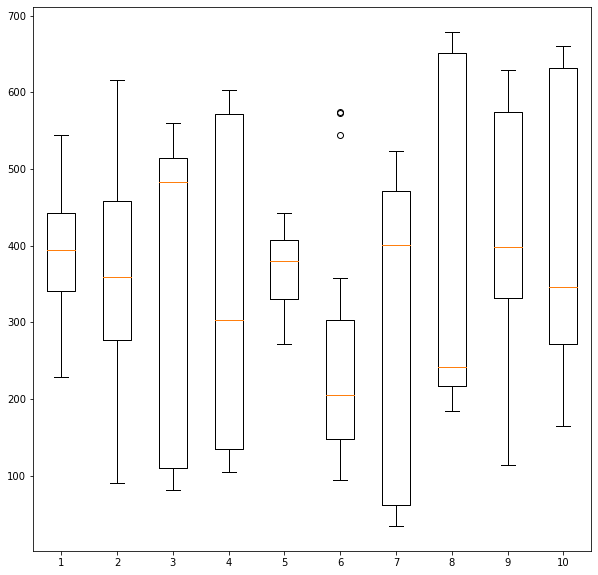

In [195]:
y = []
x = np.arange(10)

plt.figure(figsize=(10,10))
for num in range(10):
    inx_max = np.argmax(np.average(array_pixel_by_digit[num], axis = 0))
    importance_pixel  = np.argsort(np.average(array_pixel_by_digit[num], axis = 0))[-50:]
    y.append(importance_pixel)

plt.boxplot(y)
plt.show()

In [203]:
y[0] == np.argsort(np.average(array_pixel_by_digit[0], axis = 0))[-50:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [197]:
for num in range(10):
    print (num)

0
1
2
3
4
5
6
7
8
9


In [176]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [90]:
a = np.array([[1, 2], [3, 4],[2,2]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [2, 2],
       [5, 6]])

4684